In [156]:
# import libraries
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [157]:
# define probability of getting head in coin_toss and the distribution

p_head = 0.6

num_iter = 1000
distribution = [1/num_iter]*num_iter
x = np.linspace(0.001, 1, 1000)

In [158]:
# define a change in distribution for a coin_toss
head = 0
tail = 0
def coin_toss(head, tail, distribution):
    r = random.random()
    if r > p_head:
        for i in range(len(distribution)): 
            distribution[i] = distribution[i]*(1-x[i])
        tail += 1
    else:
        for i in range(len(distribution)):
            distribution[i] = distribution[i]*x[i]
        head += 1
    return head, tail, distribution

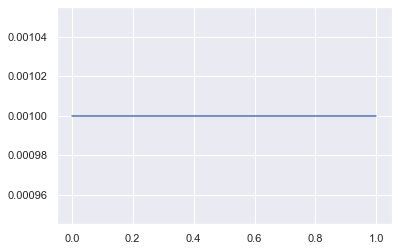

In [159]:
#plot the original distribution
plt.plot(x, distribution)
plt.show()

In [160]:
# toss 1 coin and plot

# head, tail, distribution = coin_toss(head, tail, distribution)
# print('Head: ', head)
# print('Tail: ', tail)
# plt.plot(x, distribution)
# plt.show()

Head:  1242
Tail:  858


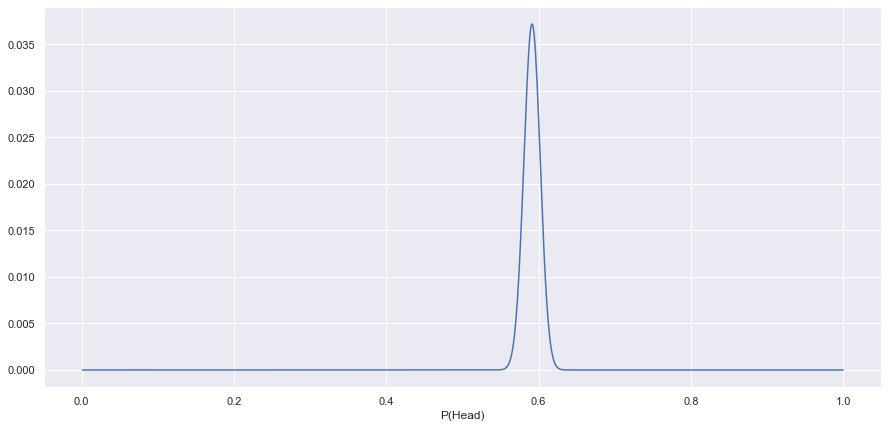

In [163]:
# toss it n times and find the distribution
num_toss = 1000

for m in range(num_toss):
    head, tail, distribution = coin_toss(head, tail, distribution)
    k = 1/sum(distribution)
    for i in range(len(distribution)):
        distribution[i] = k * distribution[i]

print('Head: ', head)
print('Tail: ', tail)
fig = plt.figure(figsize = (15, 7))
sns.set()
sns.lineplot(x, distribution)
plt.xlabel("P(Head)")
plt.show()